# Data Classification

## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt, numpy as np, scipy.stats, scipy.signal, pandas as pd

from numpy import genfromtxt
from sklearn import svm
from sklearn.model_selection import train_test_split

## Loading and visualising the sample data

In [2]:
dataset = []

In [3]:
dataset_sample = genfromtxt('new_datasets/plastic_3.csv', delimiter=',')

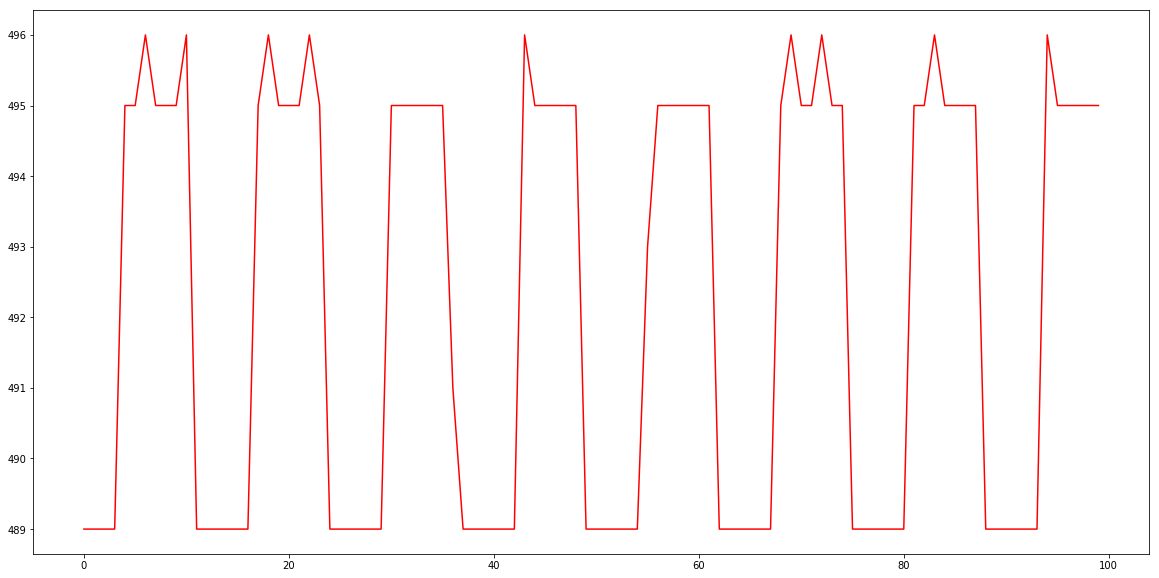

In [4]:
plt.figure(figsize=(20,10))

for i in range(4,5):
    plt.plot(dataset_sample[i],'r', linewidth=1.5)
plt.show()

In [5]:
plt.figure(figsize=(20,10))
for i in range(0, 50):
    dataset.append([np.percentile(dataset_sample[i], 75) if val > np.mean(dataset_sample[i]) else np.percentile(dataset_sample[i], 25) for val in dataset_sample[i]])
for i in range(0, 50):
    plt.plot(new_list[i],'g', linewidth=0.5)
#     plt.plot(dataset_sample[i],'r', linewidth=1.5)
plt.show()

NameError: name 'new_list' is not defined

<Figure size 1440x720 with 0 Axes>

In [6]:
len(dataset)

50

In [7]:
import csv
with open("plastic_consolidated.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(dataset)

## Loading the datasets

Each of the dataset contain a total of 10,000 points in the form of 100x100 format. All the different datapoints have been collected with the apparatus being kept at a distance of 8cm from the object.

In [19]:
#dataset_ceramic = genfromtxt('new_datasets/ceramic.csv', delimiter=',')
#dataset_wood = genfromtxt('new_datasets/ceramic_2.csv', delimiter=',')
#dataset_cardboard = genfromtxt('new_datasets/cardboard.csv', delimiter=',')
dataset_plastic = genfromtxt('plastic_consolidated.csv', delimiter=',')
dataset_ceremic = genfromtxt('ceremics_consolidated.csv', delimiter=',')
dataset_wood = genfromtxt('wood_consolidated.csv', delimiter=',')

## Plotting the pulse values

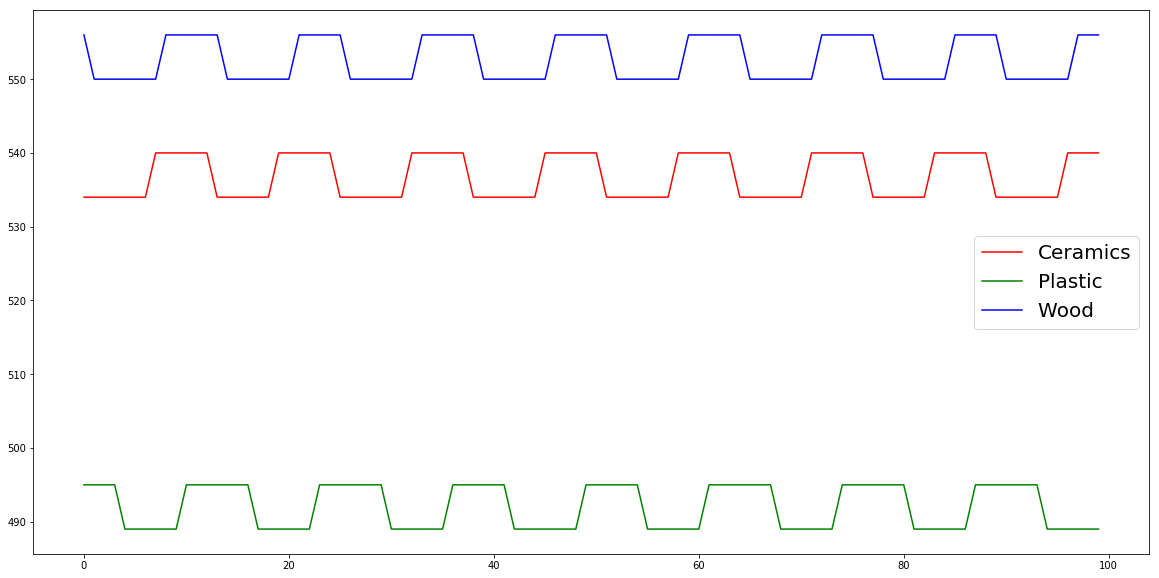

In [20]:
plt.figure(figsize=(20,10))

for i in range(1,2):
    plt.plot(dataset_ceremic[i],'r',label='Ceramics', linewidth=1.5)
    plt.plot(dataset_plastic[i],'g',label='Plastic', linewidth=1.5)
    plt.plot(dataset_wood[i],'b',label='Wood', linewidth=1.5)
plt.legend(loc='best',prop={'size': 20})
plt.show()

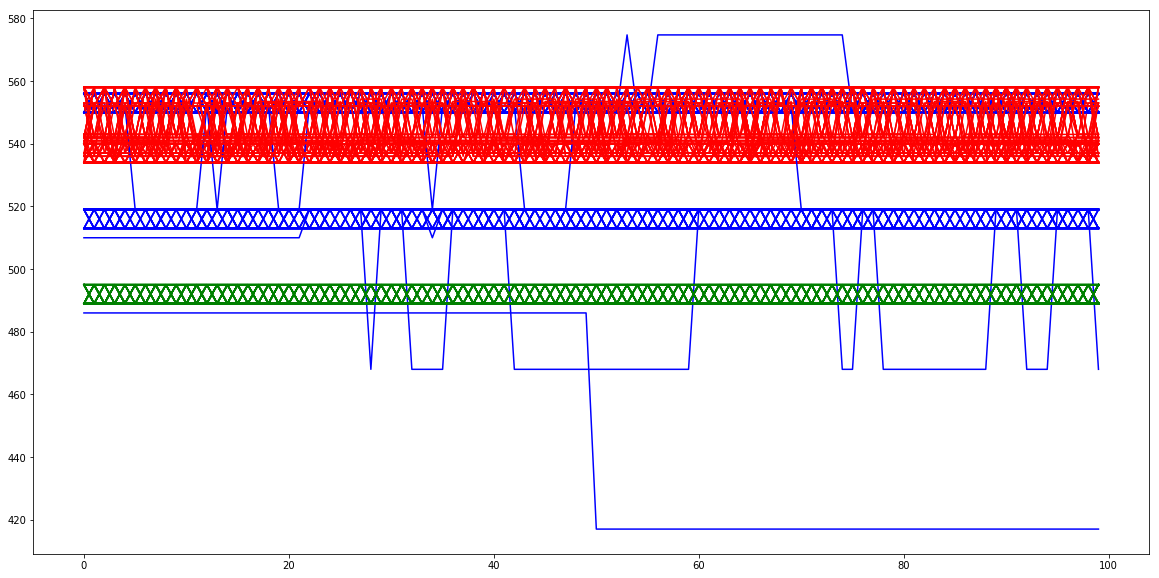

In [21]:
plt.figure(figsize=(20,10))

for i in range(0,150):
    plt.plot(dataset_ceremic[i],'r', linewidth=1.5)
    plt.plot(dataset_plastic[i],'g', linewidth=1.5)
    plt.plot(dataset_wood[i],'b', linewidth=1.5)
plt.show()

## Initialise a class ListTable

In [27]:
class ListTable(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)
    
analysis_condition = ListTable()

analysis_condition.append(['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'])

In [32]:
#temp_data = [dataset_ceramic, dataset_wood][1]
#temp_data = [new_list, new_list1,new_list_test][2]
temp_data = [dataset_ceremic,dataset_plastic,dataset_wood][2]
for i in range(0,150):
    print(np.amin(temp_data[i]),np.amax(temp_data[i]),np.ptp(temp_data[i]),
      np.percentile(temp_data[i],75),np.percentile(temp_data[i],25),
          np.median(temp_data[i]),np.mean(temp_data[i]),np.std(temp_data[i]),
          np.var(temp_data[i]),scipy.stats.kurtosis(temp_data[i]),
          scipy.stats.skew(temp_data[i]))

550.0 556.0 6.0 556.0 550.0 550.0 552.7 2.9849623113198596 8.909999999999998 -1.959595959595971 0.2010075630517968
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.941558441558437 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.82 2.9945951312322667 8.967599999999997 -1.9855479727017338 0.12021658495507899
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.7 2.9849623113198596 8.909999999999998 -1.9595959595959713 0.20100

550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.941558441558437 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.82 2.9945951312322667 8.967599999999997 -1.9855479727017338 0.12021658495507899
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.58 2.9704545106767752 8.8236 -1.9200326397388983 0.28278500713633054
519.0 552.25 33.25 552.25 519.0 552.25 536.6225 16.59504801891215 275.39561875000004 -1.9855479727017

In [33]:
for i in range(0,150):
    analysis_condition.append([np.amin(temp_data[i]),np.amax(temp_data[i]),np.ptp(temp_data[i]),
      np.percentile(temp_data[i],75),np.percentile(temp_data[i],25),
          np.median(temp_data[i]),np.mean(temp_data[i]),round(np.std(temp_data[i]),2),
          round(np.var(temp_data[i]),2),round(scipy.stats.kurtosis(temp_data[i]),2),
          round(scipy.stats.skew(temp_data[i]),2)])
    
analysis_condition

Min,Max,Range,75%,25%,Median,Mean,STD,Var,Kurtosis,skewness
534.0,541.0,7.0,541.0,541.0,541.0,540.44,1.9,3.61,7.59,-3.1
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08


## Plotting the statistics associated with a single pulse value

In [34]:
def statistics_plot(single_plot_value):
    plot_analysis = [np.amin(single_plot_value), np.amax(single_plot_value),
                     np.ptp(single_plot_value), np.percentile(single_plot_value, 75),
                     np.percentile(single_plot_value, 25), np.median(single_plot_value),
                     np.mean(single_plot_value), round(np.std(single_plot_value),2),
                     round(np.var(single_plot_value),2), round(scipy.stats.kurtosis(single_plot_value),2),
                     round(scipy.stats.skew(single_plot_value),2)]

    plt.figure(figsize=(20,10))
    datapoints = np.linspace(0,100)

    plt.plot(single_plot_value, linewidth=1.8)

    plt.plot(datapoints, np.array([plot_analysis[0] for i in range(len(datapoints))]), 'r--', label = 'Min - '+str(plot_analysis[0]))
    plt.plot(datapoints, np.array([plot_analysis[1] for i in range(len(datapoints))]), 'b--', label = 'Max - '+str(plot_analysis[1]))

    plt.plot(datapoints, np.array([plot_analysis[5] for i in range(len(datapoints))]), 'g--', label = 'Median - '+str(plot_analysis[5]))
    plt.plot(datapoints, np.array([plot_analysis[6] for i in range(len(datapoints))]), 'y--', label = 'Mean - '+str(plot_analysis[6]))

    plt.legend(loc = 2, prop={'size': 20})

### Analysis for Ceramics

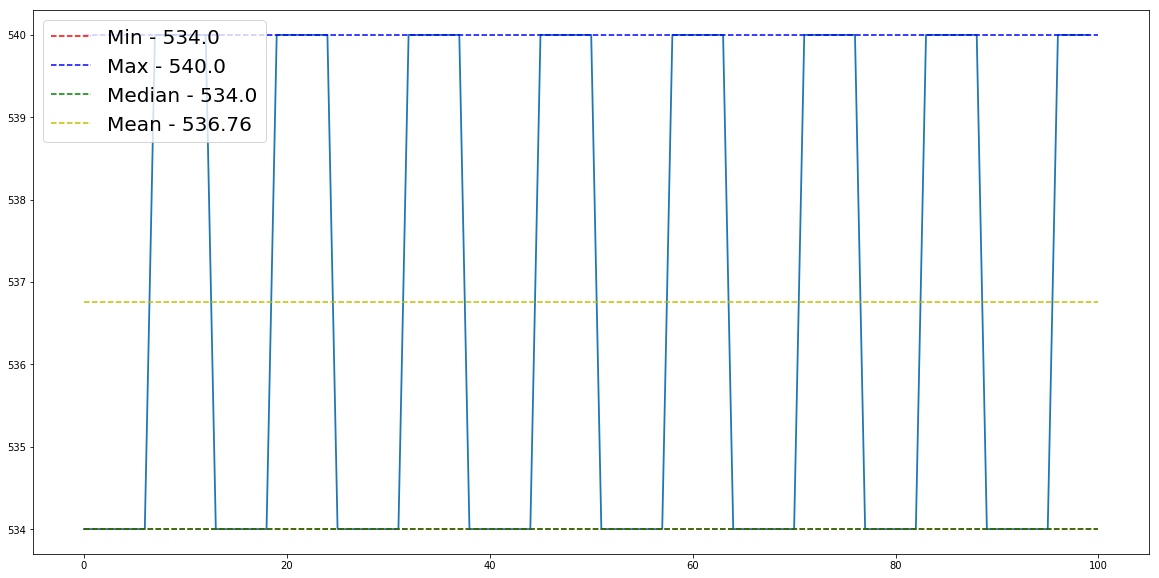

In [35]:
statistics_plot(dataset_ceremic[1])

### Analysis for Plastics

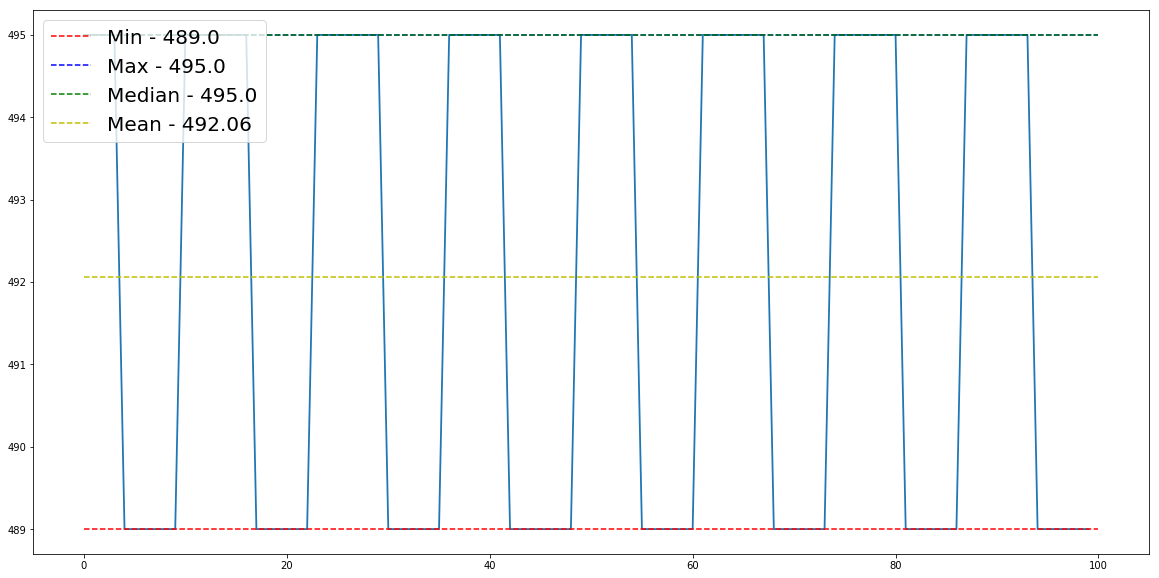

In [36]:
statistics_plot(dataset_plastic[1])

### Analysis for Wood

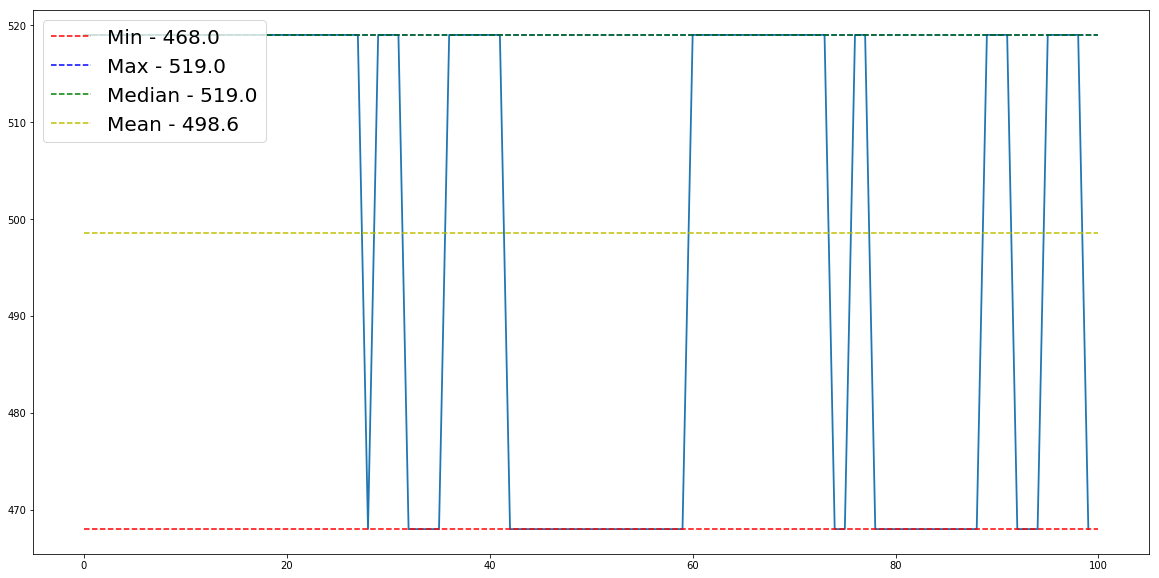

In [37]:
statistics_plot(dataset_wood[93])

## Signal Analysis : Range Analysis 

In [83]:
x_train = analysis_condition[1:]
#x_train = analysis_condition
df = pd.DataFrame(x_train)

### Bar graph representing range for Ceramics

<BarContainer object of 150 artists>

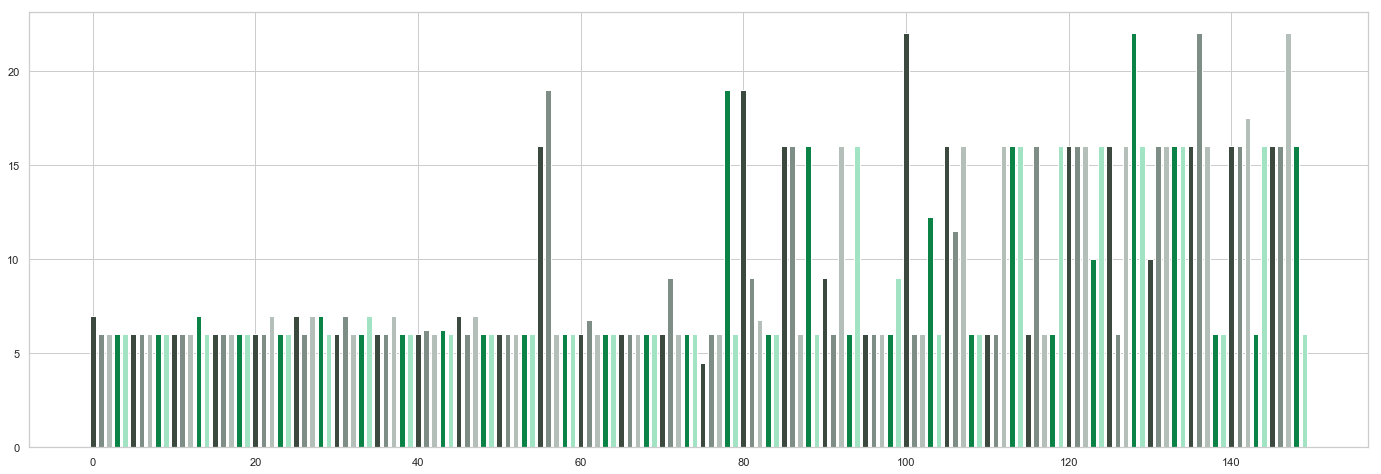

In [68]:
plt.figure(figsize=(24,8))
y_axis = np.arange(150)
plt.bar(y_axis,df.loc[:,2][:150], width=0.7, color=['#3C493F', '#7E8D85', '#B3BFB8', '#0C8346', '#A2E3C4'])

### Bar graph representing range for Plastics

<BarContainer object of 150 artists>

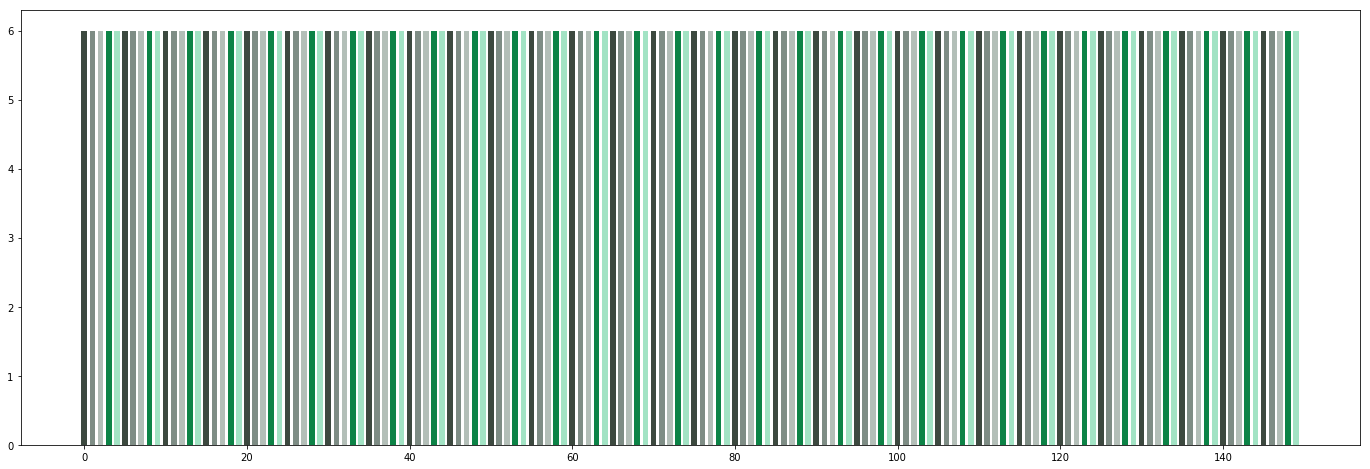

In [41]:
plt.figure(figsize=(24,8))
y_axis = np.arange(150)
plt.bar(y_axis,df.loc[:,2][150:300], width=0.7, color=['#3C493F', '#7E8D85', '#B3BFB8', '#0C8346', '#A2E3C4'])
#, color=['#3C493F', '#7E8D85', '#B3BFB8', '#F0F7F4', '#A2E3C4'])

### Bar graph representing range for Wood

<BarContainer object of 150 artists>

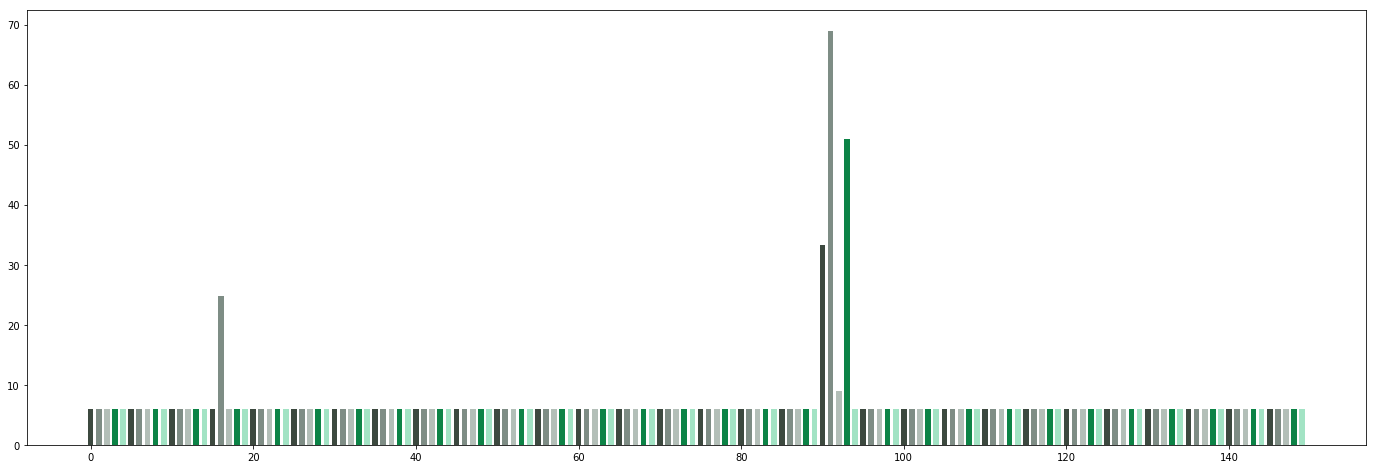

In [42]:
plt.figure(figsize=(24,8))
y_axis = np.arange(150)
plt.bar(y_axis,df.loc[:,2][300:450], width=0.7, color=['#3C493F', '#7E8D85', '#B3BFB8', '#0C8346', '#A2E3C4'])

In [71]:
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
dtype: object

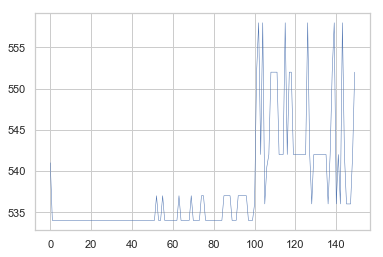

In [85]:
sns.lineplot(data = df.loc[:,4][0:150], palette="tab7", linewidth=0.5)

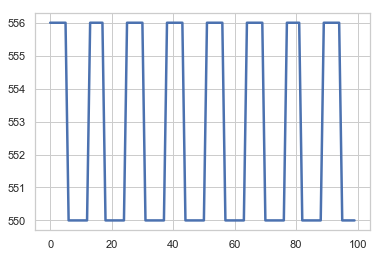

In [50]:
import seaborn as sns
sns.set(style="whitegrid")
sns.lineplot(data=dataset_wood[3], palette="tab10", linewidth=2.5)

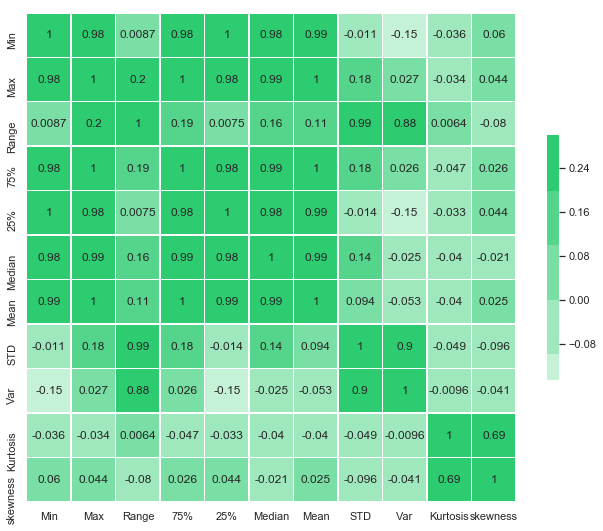

In [49]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'] )

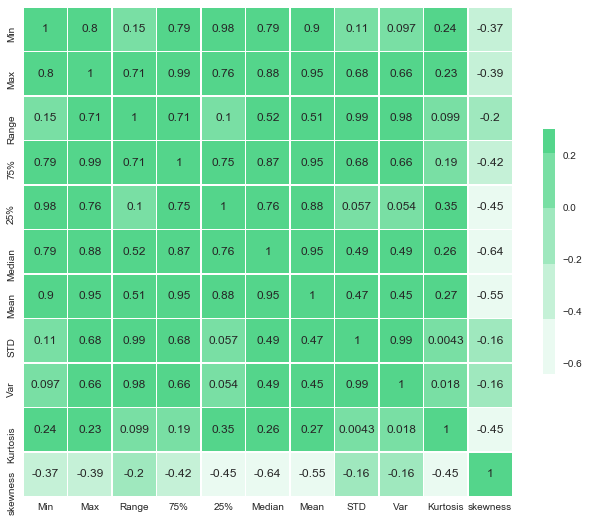

In [291]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.iloc[:150].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'] )

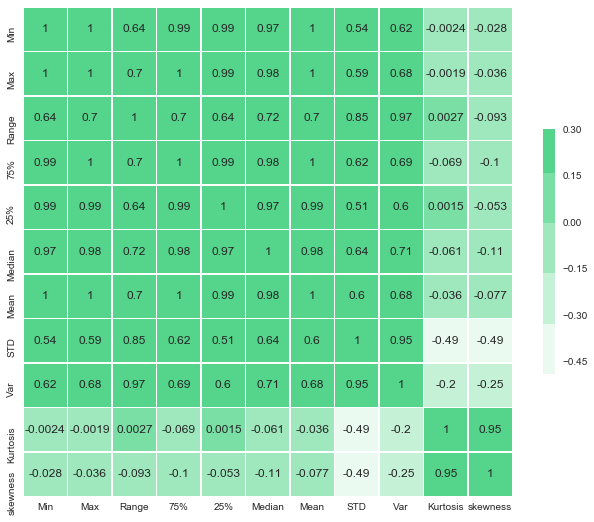

In [314]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.iloc[148:300].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'] )

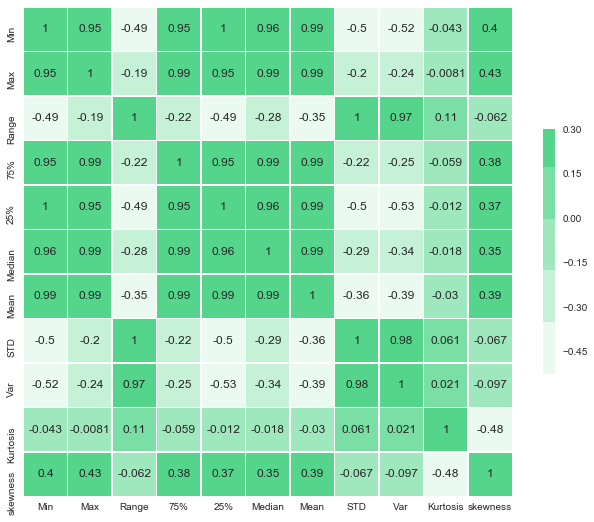

In [293]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.iloc[300:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'] )

Plot of Varience vs Kurtosis

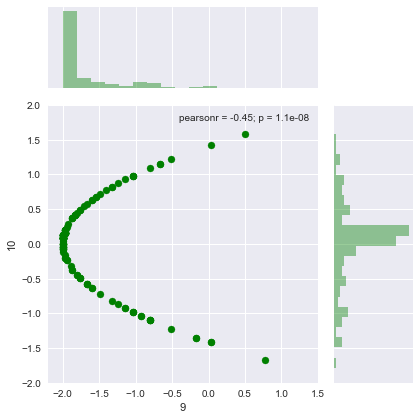

In [283]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot(9, 10, data=df[:150],
                  xlim=(-2.2,1.5), ylim=(-2, 2), color="g",ratio=3)

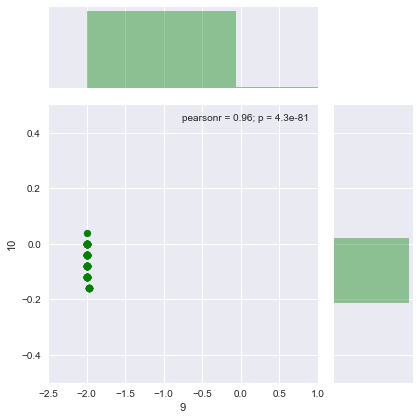

In [281]:
g = sns.jointplot(9, 10, data=df[150:300],
                  xlim=(-2.5,1), ylim=(-0.5,0.5), color="g",ratio=3)

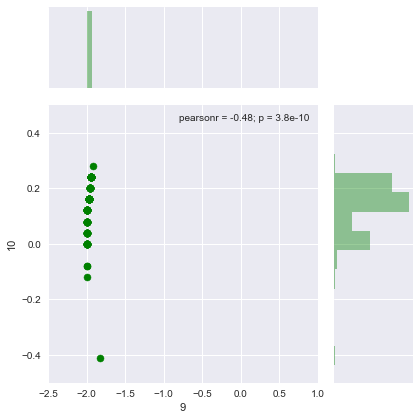

In [279]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(40,10))
sns.jointplot(9, 10, data=df[300:], linewidth=0.5, ratio=3,
                  xlim=(-2.5,1), ylim=(-0.5,0.5), color="g")


## Getting ready with dataset

In [25]:
x_train = analysis_condition[1:]
df = pd.DataFrame(x_train)

### Correlation of dataframe

In [13]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.948495,-0.491818,0.951455,0.999138,0.964828,0.987350,-0.499117,-0.522925,-0.042634,0.400415
1,0.948495,1.000000,-0.190657,0.994183,0.946935,0.985731,0.985198,-0.199624,-0.237351,-0.008071,0.428903
2,-0.491818,-0.190657,1.000000,-0.215818,-0.493435,-0.280486,-0.351741,0.997972,0.968054,0.109928,-0.061949
3,0.951455,0.994183,-0.215818,1.000000,0.949893,0.988839,0.987207,-0.218781,-0.245804,-0.058957,0.384288
4,0.999138,0.946935,-0.493435,0.949893,1.000000,0.964831,0.986677,-0.501797,-0.525761,-0.012215,0.370552
5,0.964828,0.985731,-0.280486,0.988839,0.964831,1.000000,0.991093,-0.287279,-0.335006,-0.017806,0.349470
6,0.987350,0.985198,-0.351741,0.987207,0.986677,0.991093,1.000000,-0.358715,-0.389140,-0.029614,0.393320
7,-0.499117,-0.199624,0.997972,-0.218781,-0.501797,-0.287279,-0.358715,1.000000,0.976591,0.060990,-0.066810
8,-0.522925,-0.237351,0.968054,-0.245804,-0.525761,-0.335006,-0.389140,0.976591,1.000000,0.020747,-0.096774
9,-0.042634,-0.008071,0.109928,-0.058957,-0.012215,-0.017806,-0.029614,0.060990,0.020747,1.000000,-0.483128


### Making a dataframe

In [14]:
x_train_array = df.as_matrix()
len(x_train_array)

150

### Labelling the data

In [23]:
y_train_array = []
for i in range(0,150):
    y_train_array.append('Ceremic')
for i in range(150,300):   
    y_train_array.append('Plastic')
for i in range(300,450):   
    y_train_array.append('Wood')
    
x_train_array = np.array(x_train_array)
print(x_train_array.shape)

x_train_array = x_train_array.reshape(x_train_array.shape[0],11)
print(x_train_array.shape)

(450, 11)
(450, 11)


## Testing out the Machine Learning algorithm

### Test-train split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_train_array, y_train_array, test_size=0.33)
clf = svm.SVC(probability=True)

### Initialising Machine Learning algorithm

In [25]:
clf = svm.SVC(probability=True)
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Confidence values of each class

In [26]:
clf.predict_proba(x_train_array)

array([[0.95383327, 0.00980901, 0.03635773],
       [0.95410976, 0.00977631, 0.03611393],
       [0.95380857, 0.00980532, 0.03638611],
       ...,
       [0.00377799, 0.00746596, 0.98875605],
       [0.00375153, 0.00745239, 0.98879608],
       [0.00375236, 0.00745286, 0.98879478]])

### Prediction of the test datapoints

In [27]:
clf.predict(x_train_array)

array(['Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 

### Score of the classifier

In [28]:
clf.score(x_train_array, y_train_array) * 100

99.55555555555556

## Working with the filtered dataset

### Loading the filtered dataset

In [56]:
for i in range(0, 50):
    new_list1 = [np.percentile(dataset_ceramic[i], 75) if val > np.mean(dataset_ceramic[i]) else np.percentile(dataset_ceramic[i], 25) for val in dataset_ceramic[i]]
print(new_list1)

[558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0]


### Plotting the filtered dataset

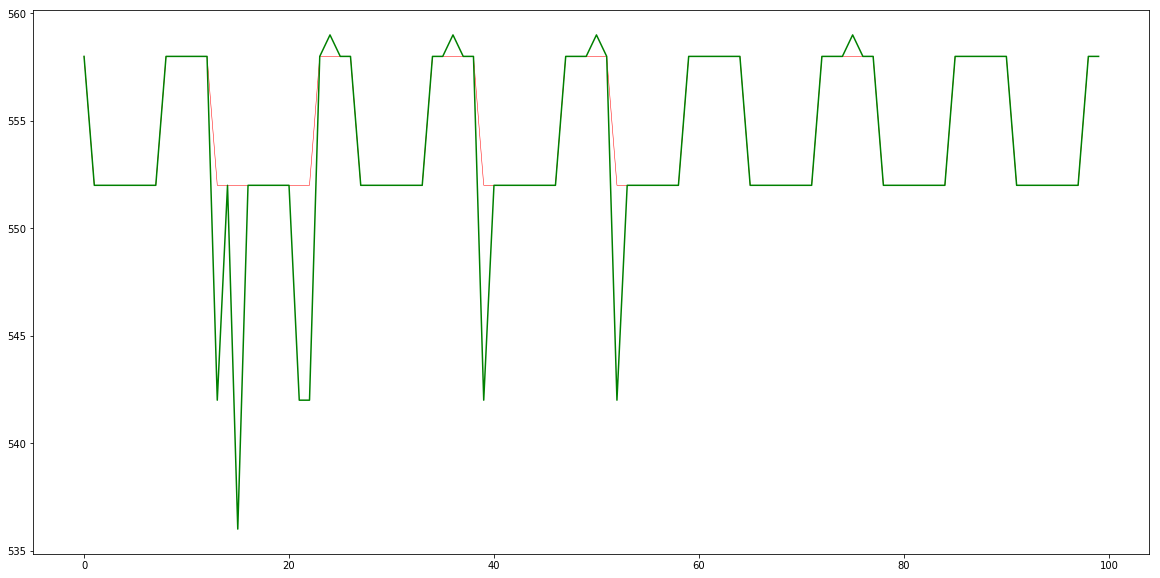

In [57]:
plt.figure(figsize=(20,10))

plt.plot(new_list1,'r', linewidth=0.5)
plt.plot(dataset_ceramic[49],'g', linewidth=1.5)
plt.show()

In [110]:
new_list = []
new_list1 = []
for i in range(0, 50):
    new_list.append([np.percentile(dataset_wood[i], 75) if val > np.mean(dataset_wood[i]) else np.percentile(dataset_wood[i], 25) for val in dataset_wood[i]])
    new_list1.append([np.percentile(dataset_ceramic[i], 75) if val > np.mean(dataset_ceramic[i]) else np.percentile(dataset_ceramic[i], 25) for val in dataset_ceramic[i]])

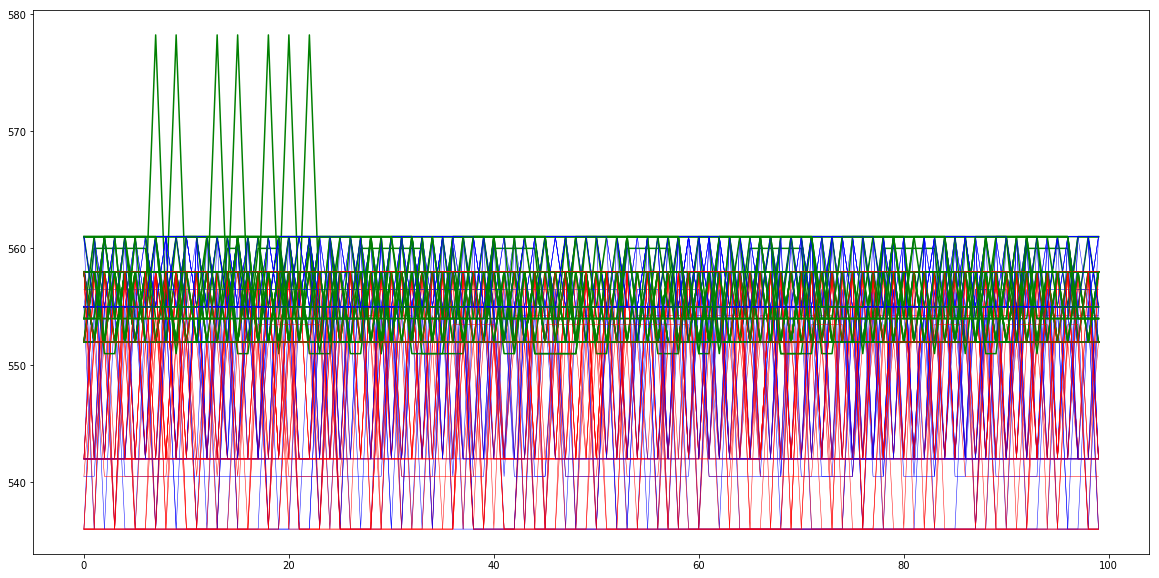

In [149]:
plt.figure(figsize=(20,10))
for i in range(0,50):
    plt.plot(new_list[i],'b', linewidth=0.5)
    plt.plot(new_list1[i],'r', linewidth=0.5)
    plt.plot(new_list_test[i],'g', linewidth=1.5)
plt.show()

### Plotting the datapoints of a single pulse

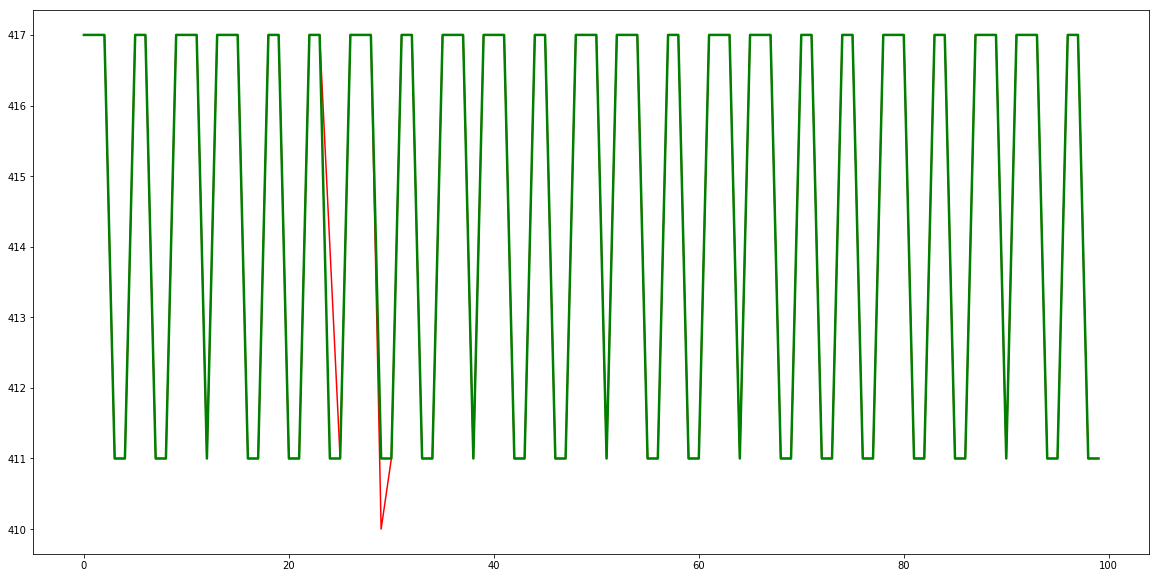

In [38]:
plt.figure(figsize=(20,10))

for i in range(0,1):
    plt.plot(dataset_ceramic_8cm[i],'r', linewidth=1.5)
    plt.plot(filter_dataset_ceramic_8cm[i],'g', linewidth=2.5)
plt.show()

In [152]:
new_list_test = []
y_test = []
for i in range(0, 50):
    new_list_test.append([np.percentile(dataset_sample[i], 75) if val > np.mean(dataset_sample[i]) else np.percentile(dataset_sample[i], 25) for val in dataset_sample[i]])
    y_test.append('Ceramic')

In [134]:
clf.predict(new_list_test)

ValueError: X.shape[1] = 100 should be equal to 6, the number of features at training time

### For the poster

In [217]:
class ListTablePrediction(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th align = 'center'>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)
    
analysis_condition = ListTablePrediction()
analysis_condition.append(['', 'Prediction Table Matrix', ''])
analysis_condition.append(['Ceramics', 'Plastic', 'Wood'])
analysis_condition

,Prediction Table Matrix,
Ceramics,Plastic,Wood


In [218]:
predicted_array = clf.predict_proba(x_train_array)[0]

In [219]:
analysis_condition.append([round(predicted_array[0],4), round(predicted_array[1],4),round(predicted_array[2],4)])

In [220]:
analysis_condition

,Prediction Table Matrix,
Ceramics,Plastic,Wood
0.9642,0.0113,0.0245
